# Задачи классификации в NLP

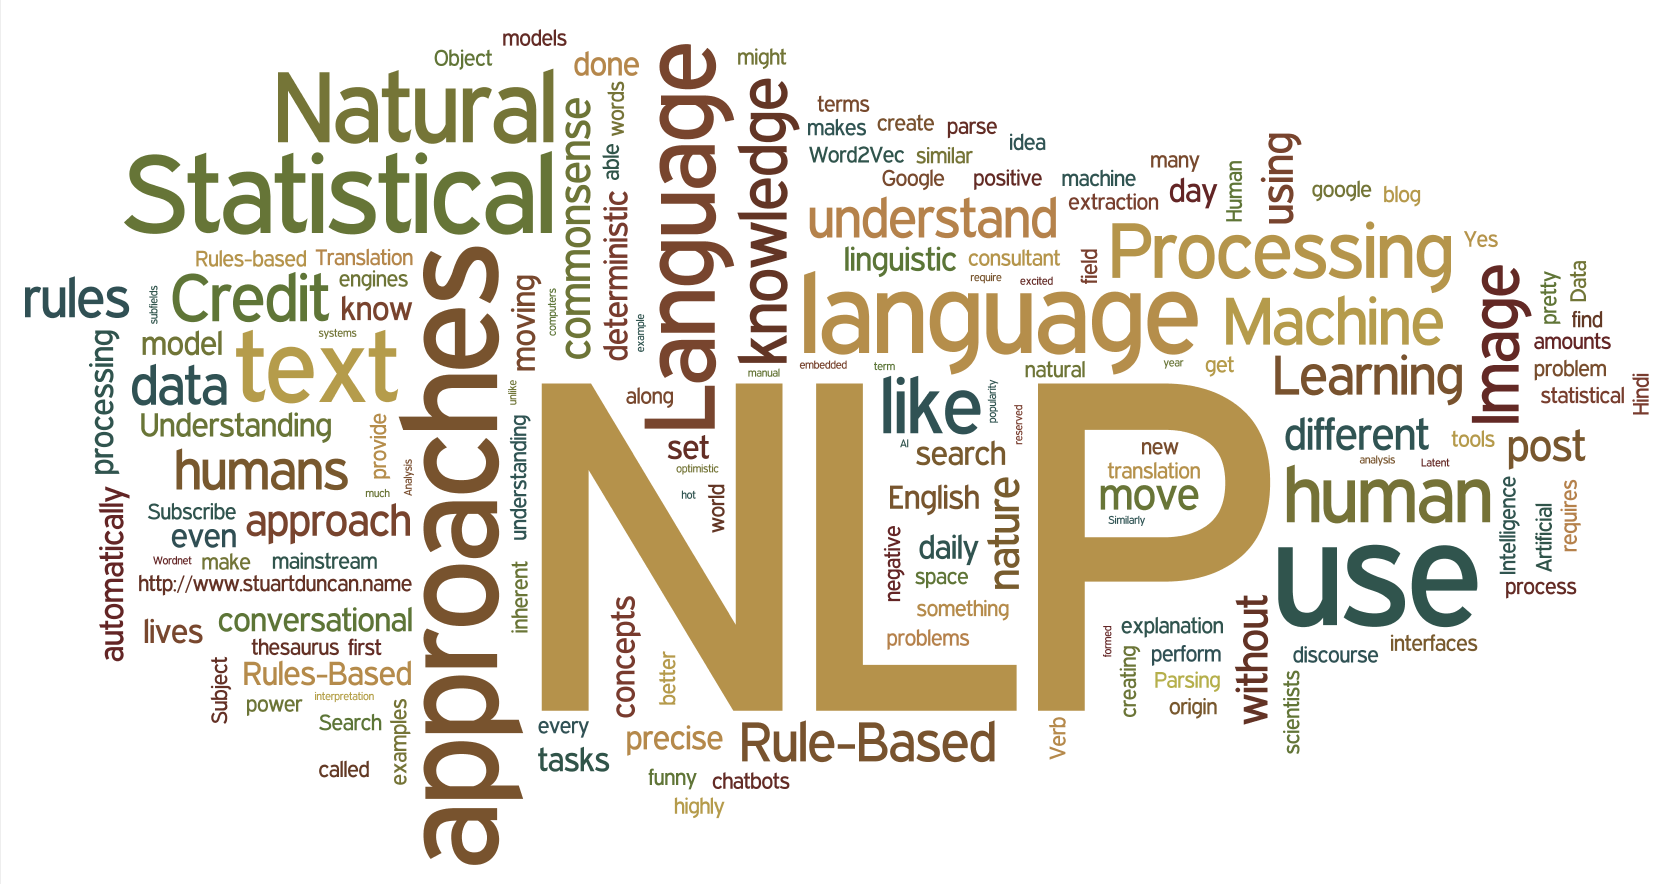

## Что такое NLP?

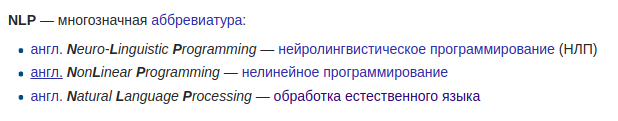

<b>NLP</b> - один из разделов CS и AI, которые связаны с взаимодействием между человеком и компьютером, и изучает проблемы анализа, распознавания и генерации речи.

<b>Основные задачи:</b>
<ul>
    <li>speech recognition</li>
    <li>NLU</li>
    <li>NLG</li>
</ul>

## Какие задачи?

<ul>
    <li>Анализ настроения/тональности (sentiment analysis)</li> 
    <li>Определение темы разговора (intent classification)</li>
    <li>Целевые классификаторы (facebook, ...)</li>
    <li>Выделение именованных сущностей</li>
    <li>Классификация писем и фильтрация спама</li>
    <li>…</li>
</ul>

# Разберём подробнее

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

## Данные

Воспользуемся следующими датасетами:
<ol>
    <li><a href="https://github.com/jacoxu/StackOverflow">Short text dataset for classification and clustering extracted from StackOverflow</a>
    <li>IMDB sentiment dataset</li>
</ol>

## StackOverflow

In [2]:
sentences = open('./StackOverflow-master/rawText/title_StackOverflow.txt').read().split('\n')
labels = open('./StackOverflow-master/rawText/label_StackOverflow.txt').read().split('\n')
text_labels = ['wordpress', 'oracle', 'svn', 'apache', 'excel',
               'matlab', 'visual studio', 'cocoa', 'osx', 'bash',
               'spring', 'hibernate', 'scala', 'sharepoint', 'ajax',
               'qt', 'drupal', 'linq', 'haskell', 'magento']

labels = list(map(int, labels[:20000]))
sentences = sentences[:20000]

### Немного информации о данных

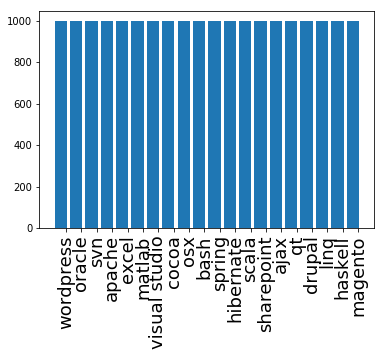

In [3]:
count_themes = Counter(labels)
l, v = zip(*count_themes.items())

lbl = np.array(l)
val = np.array(v)

ind = np.arange(len(lbl))

bar_width = 0.35

plt.bar(ind, val)
plt.xticks(ind + bar_width, text_labels, rotation='vertical', fontsize=18)
plt.show()

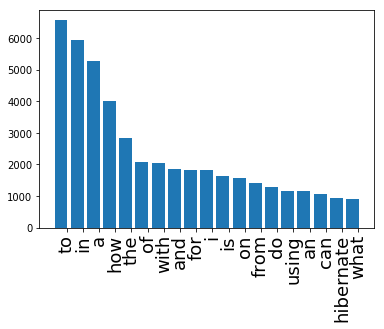

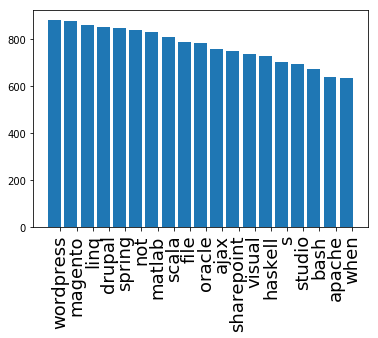

In [4]:
all_words = [x.lower() for sentence in sentences for x in re.findall(r'\w+', sentence)]


count_words = Counter(all_words)
l, v = zip(*count_words.items())

indSort = np.argsort(v)[::-1]
for i in range(0, 2):
    indsubset = indSort[20*i:20*i+19]

    lbl = np.array(l)[indsubset]
    val = np.array(v)[indsubset]

    ind = np.arange(len(lbl))

    plt.bar(ind, val)
    plt.xticks(ind + bar_width, lbl, rotation='vertical', fontsize=18)
    plt.show()

## План действий 

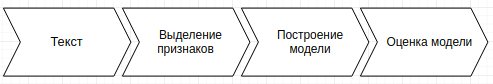

## Способы перевода слов в вектор

### Bag Of Words

Bag Of Words - модель текстов на естевственном языке, в которой в каждый документ выглядит как неупорядоченный набор слов без сведений о связях между ними.

Обычно, мешок слов представляется в виде матрицы, в которой столбец соответствует некоторому слово, строка - некоторому документу.

<b>Например:</b>
<br>
<br>
У нас есть 2 документа: "Модель мешок слов", "Стоит мешок картошки".
<br>
<br>
$BOW = \{\text{модель}, \text{мешок}, \text{слов}, \text{стоит}, \text{картошки}\}$
<br>
<br>
Таким образом, у нас будет 2 вектора для каждого докумета:
<br>
<br>
$D_1 = (1, 1, 1, 0, 0)$
<br>
$D_2 = (0, 1, 0, 1, 1)$

### Добавим немного связей: n-граммы

<b>N-грамма</b> - последовательность из n элементов.

<b>Например:</b>
<br>
<br>
У нас есть 2 документа: "Модель мешок слов", "Стоит мешок картошки".
Построим биграммы.
<br>
<br>
$BOW = \{\text{модель}, \text{мешок}, \text{слов}, \text{стоит}, \text{картошки},
\text{модель мешок}, \text{мешок слов}, \text{стоит мешок}, \text{мешок картошки}\}$
<br>
<br>
Таким образом, у нас будет 2 вектора для каждого докумета:
<br>
<br>
$D_1 = (1, 1, 1, 0, 0, 1, 1, 0,0 )$
<br>
$D_2 = (0, 1, 0, 1, 1, 0, 0, 1, 1)$

In [5]:
X = sentences.copy()
y = labels.copy()

y = np.array(y)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = np.array(l)[indSort[:17]]
tokenizer = lambda x : re.findall(r'\w+', x)

cntv = CountVectorizer(
    lowercase=True, 
    ngram_range=(1,2),
    stop_words=stop_words.tolist()
)


X_cntv = cntv.fit_transform(X)
X_cntv

<20000x85392 sparse matrix of type '<class 'numpy.int64'>'
	with 223165 stored elements in Compressed Sparse Row format>

### TF-IDF

<b>TF-IDF</b> - <i>Term Frequency - Inversed Document Frequency</i> - статичтическая мера, которую используют для оценки важности слова или словосочетания в контексте документа.

<b> TF: </b>
<br>
<br>
$$TF(w, d) = \frac{n_w}{n_d}$$
<br>
$n_w$ - количество слов w в документе
<br>
$n_d$ - количество слов всего в документе

<b> IDF: </b>
<br>
<br>
$$IDF(w, D) = \log \frac{|D|}{|\{d \in D | w\in d\}|}$$
<br>
$|D|$ - всего документо в коллекции
<br>
$\{d \in D | w\in d\}$ - количество документов коллекции, в которых встретилось w.

<b> TF-IDF: </b>
<br>
<br>
$$TFIDF(w, d, D) = tf(w, d) \times idf(w, D)$$

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(
    lowercase=True, 
    ngram_range=(1,2),
    stop_words=stop_words.tolist()
)

X_tfidfv = tfidfv.fit_transform(X)
X_tfidfv

<20000x85392 sparse matrix of type '<class 'numpy.float64'>'
	with 223165 stored elements in Compressed Sparse Row format>

### Сингулярное разложение

Пусть у нас есть некоторая матрица $M \in \mathbb{M_{m\times n}}(\mathbb{F})$, где $\mathbb{F} = \mathbb{R} | \mathbb{C}$.

<br>
<br>

Пусть есть некоторое число $\sigma \in \mathbb{R}:  \exists u\in \mathbb{F^m}, v\in \mathbb{F^n}\ \ \  Mv=\sigma u,\   M^* u = \sigma v$ 
<br>
<br>
$\sigma$ - сингулярное число, $u, v$ - левый и правый сингулярные вектора.

<br>
<br>

Сингулярным разложением матрицы $M$ называется разложение 
$$M=U \Sigma V^*$$
<br>
<br>
$\Sigma$ -  матрица размера $m\times n$ с неотрицательными элементами, у которой элементы, лежащие на главной диагонали - это сингулярные числа (а все элементы, не лежащие на главной диагонали, являются нулевыми), а матрицы $ U $(порядка $m$) и $V $(порядка $n$) - это две унитарные матрицы, состоящие из левых и правых сингулярных векторов соответственно.
</ul>
<br>
<br>
<br>
Для того, чтобы сэкономить память и время обработки, используют сокращённое представление сингулярного разложения. Т.е, для исходной матрицы разложение выглядит следующим образом:
$$M=U_r \Sigma_r V^*_r$$
    
Вычисляются только $r$ столбцов $U$ и $r$ строк $V^*$. Остальные столбцы $U$ и строки $V^*$ не вычисляются.

(см.: <a href="https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B8%D0%B1%D0%BB%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B5%D0%B9_%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B5%D0%B3%D0%BE_%D1%80%D0%B0%D0%BD%D0%B3%D0%B0"> Теорема Эккарта-Янга</a>)

In [9]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, n_iter=10, random_state=42)

X_tfidfv_svd = svd.fit_transform(X_tfidfv)
X_tfidfv_svd.shape

(20000, 300)

## Word embeddings 

### Word2Vec

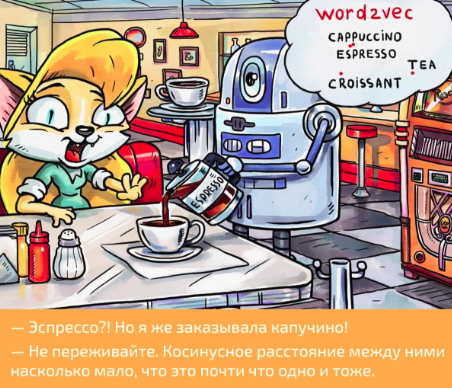

Метод, который позволяет представить слово $w$ в виде некоторого вектора: $$ w \rightarrow \overrightarrow{w} \in \mathbb{R}^d$$

Пусть у нас есть выборка, которая состоит из текстов $T$, каждый представляет собой набор слов $w_i \in T, \  i=\overline{1,n}$

Задача word2vec:
$$\sum_{i=1}^{n} \sum _{j=-k}^{k} \log p(w_{(i+j)}|w_i) \rightarrow \max$$
<br>
Где вероятность - softmax:
$$p(w_{i}|w_j) = \frac{\exp\big(\langle\overrightarrow{w}_i,\overrightarrow{w}_j\rangle\big)}{\sum_{w\in V} \exp\big(\langle\overrightarrow{w},\overrightarrow{w}_j\rangle\big)}$$

2 алгоритма:
<ul>
    <li>CBOW - предсказываем целевое слово</li>
    <li>Skip-gram - предсказываем контекст</li>
</ul>

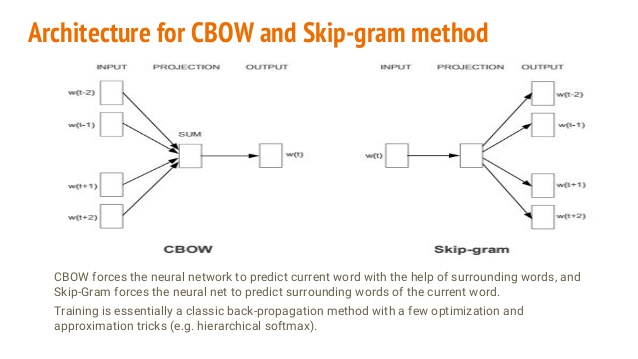

В результате обучения на большом объёме данных, получим векторное представление слов, в котором:
<br>
<ul>
    <li>Похожие слова имеют близкие векторы (например, по косинусной мере)</li>
    <li>Арифметические операции над этими векторами имеют смысл</li>
</ul>

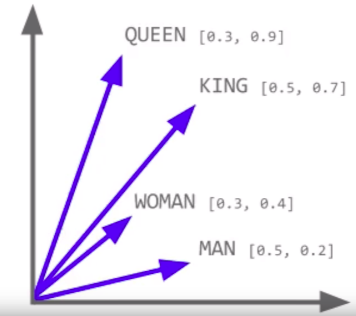

In [28]:


import gensim
import nltk

tokenized_X = [nltk.word_tokenize(x.lower()) for x in X] 

model = gensim.models.Word2Vec(tokenized_X, size=50, window=3, min_count=1, workers=4)

In [29]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(list(word2vec.values())[0])

    def transform(self, X):
        res = []
        for x in X:
            try:
                res.append(self.word2vec[x])
            except Exception:
                res.append(np.array([0 for i in range(self.dim)]))
        return np.mean(res, axis=0)

In [30]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))
mev = MeanEmbeddingVectorizer(w2v)

X_w2v_mean = np.array([mev.transform(x) for x in tokenized_X])

/home/philipp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [31]:
model['collaborative']

/home/philipp/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.0238528 ,  0.05958816,  0.00072114,  0.01844407,  0.01677131,
        0.03690162, -0.0093231 , -0.05847194,  0.00768605, -0.02480661,
        0.05349863, -0.02908207,  0.0115089 , -0.03139281,  0.00409327,
       -0.03103447,  0.01138644, -0.0430373 , -0.04983994, -0.00818841,
       -0.00785547, -0.02730463,  0.05601011, -0.05080411, -0.03417968,
        0.00229913,  0.03509311, -0.02401059, -0.01919795,  0.10345452,
       -0.05221042,  0.00577947, -0.02117547, -0.03001393,  0.00294733,
       -0.07205909, -0.00285179, -0.00433803,  0.07726805,  0.00970278,
       -0.02704074, -0.05381814,  0.0340394 ,  0.02574118, -0.02328874,
        0.02532359, -0.03747556,  0.01369695,  0.09409188, -0.03940048],
      dtype=float32)

## Classification

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


kf = KFold(n_splits=5, random_state=42)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_cntv[train_index], X_cntv[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    res = accuracy_score(y_test, preds)
    print(res)
    results.append(res)

print("Mean: {}".format(np.array(results).mean()))

0.8605
0.86375
0.868
0.864
0.877
Mean: 0.8666499999999999


In [113]:
kf = KFold(n_splits=5, random_state=42)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_tfidfv[train_index], X_tfidfv[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    res = accuracy_score(y_test, preds)
    print(res)
    results.append(res)

print("Mean: {}".format(np.array(results).mean()))

0.8715
0.873
0.87875
0.87075
0.885
Mean: 0.8758000000000001


In [114]:
kf = KFold(n_splits=5, random_state=42)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_w2v_mean[train_index], X_w2v_mean[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    res = accuracy_score(y_test, preds)
    print(res)
    results.append(res)

print("Mean: {}".format(np.array(results).mean()))

0.6735
0.66675
0.6495
0.651
0.492
Mean: 0.6265499999999999


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


kf = KFold(n_splits=5, random_state=42)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X_tfidfv_svd[train_index], X_tfidfv_svd[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    res = accuracy_score(y_test, preds)
    print(res)
    results.append(res)

print("Mean: {}".format(np.array(results).mean()))

0.8305
0.822
0.83625
0.81625
0.83825
Mean: 0.82865


## W2V + CNN

In [163]:
from keras.layers import Input, Dense, Embedding, Convolution1D, MaxPooling1D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adamfrom keras.models import Model

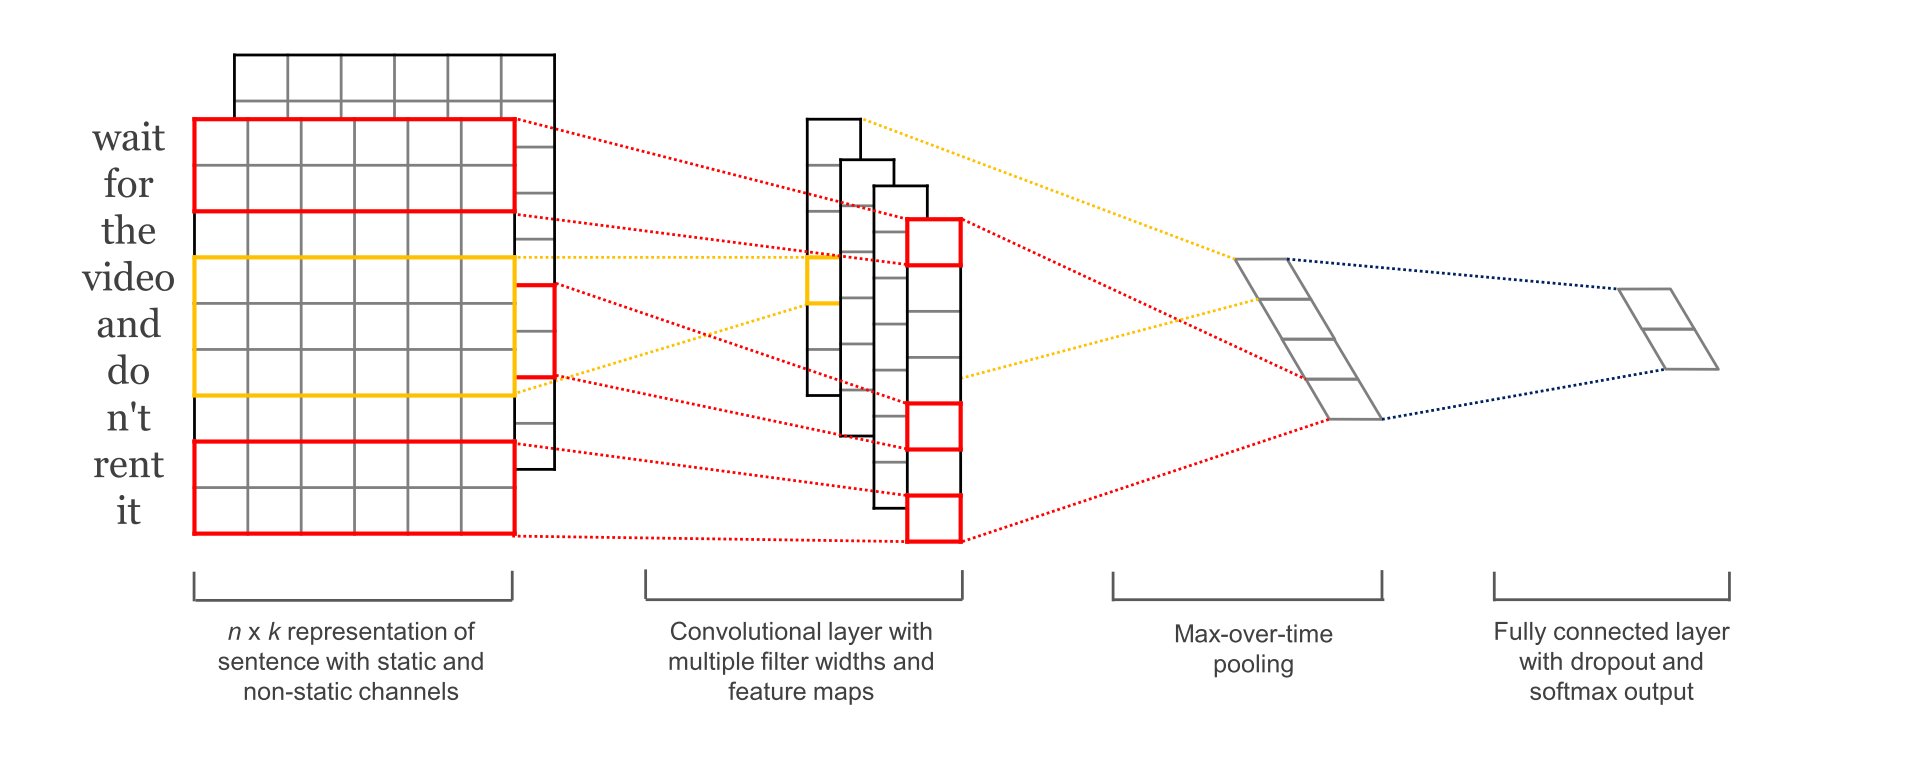

In [269]:
# try Encoding
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

#vocab_size = 13436
#encoded_docs = [one_hot(d, vocab_size) for d in X]
#max_length = 41
#padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [270]:
#X_train, X_test, y_train, y_test = train_test_split( padded_docs, y, test_size=0.15, random_state=42)

In [281]:
sequence_length = 500
vocabulary_size = top_words # 13436
embedding_dim = 32
filter_sizes = [3, 8]
num_filters = 10
drop = (0.5, 0.8)
hidden_dims = 50

epochs = 10
batch_size = 32

In [282]:
inputs = Input(shape=(sequence_length, ))
# векторное предсатвление
z = Embedding(vocabulary_size, embedding_dim, input_length=sequence_length)(inputs)

# dropout
reshape = Dropout(drop[0])(z)

# свёрточные блоки
conv_blocks = []
for size in filter_sizes:
    # свёртка фильтрами с разными размерами ядер, 
    conv = Convolution1D(filters=num_filters,
                         kernel_size=size,
                         padding="valid",
                         activation="relu",
                         strides=1)(reshape)
    # пулинг
    conv = MaxPooling1D(pool_size=2)(conv)
    
    # 1d represantation
    conv = Flatten()(conv)
    conv_blocks.append(conv)

out = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

out = Dropout(drop[1])(out)
out = Dense(hidden_dims, activation="relu")(out)
model_output = Dense(1, activation="sigmoid")(out)

nnet = Model(inputs, model_output)

adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
nnet.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
print("Traning Model...")
nnet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Traning Model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 31s 1ms/step - loss: 0.5972 - acc: 0.6556 - val_loss: 0.4217 - val_acc: 0.7922
Epoch 2/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.4052 - acc: 0.8280 - val_loss: 0.3426 - val_acc: 0.8386
Epoch 3/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.3596 - acc: 0.8533 - val_loss: 0.3269 - val_acc: 0.8515
Epoch 4/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.3470 - acc: 0.8618 - val_loss: 0.3382 - val_acc: 0.8378
Epoch 5/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.3520 - acc: 0.8624 - val_loss: 0.6300 - val_acc: 0.5596
Epoch 6/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.3436 - acc: 0.8679 - val_loss: 0.3247 - val_acc: 0.8664
Epoch 7/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.3384 - acc: 0.8712 - val_loss:

## W2V + RNN

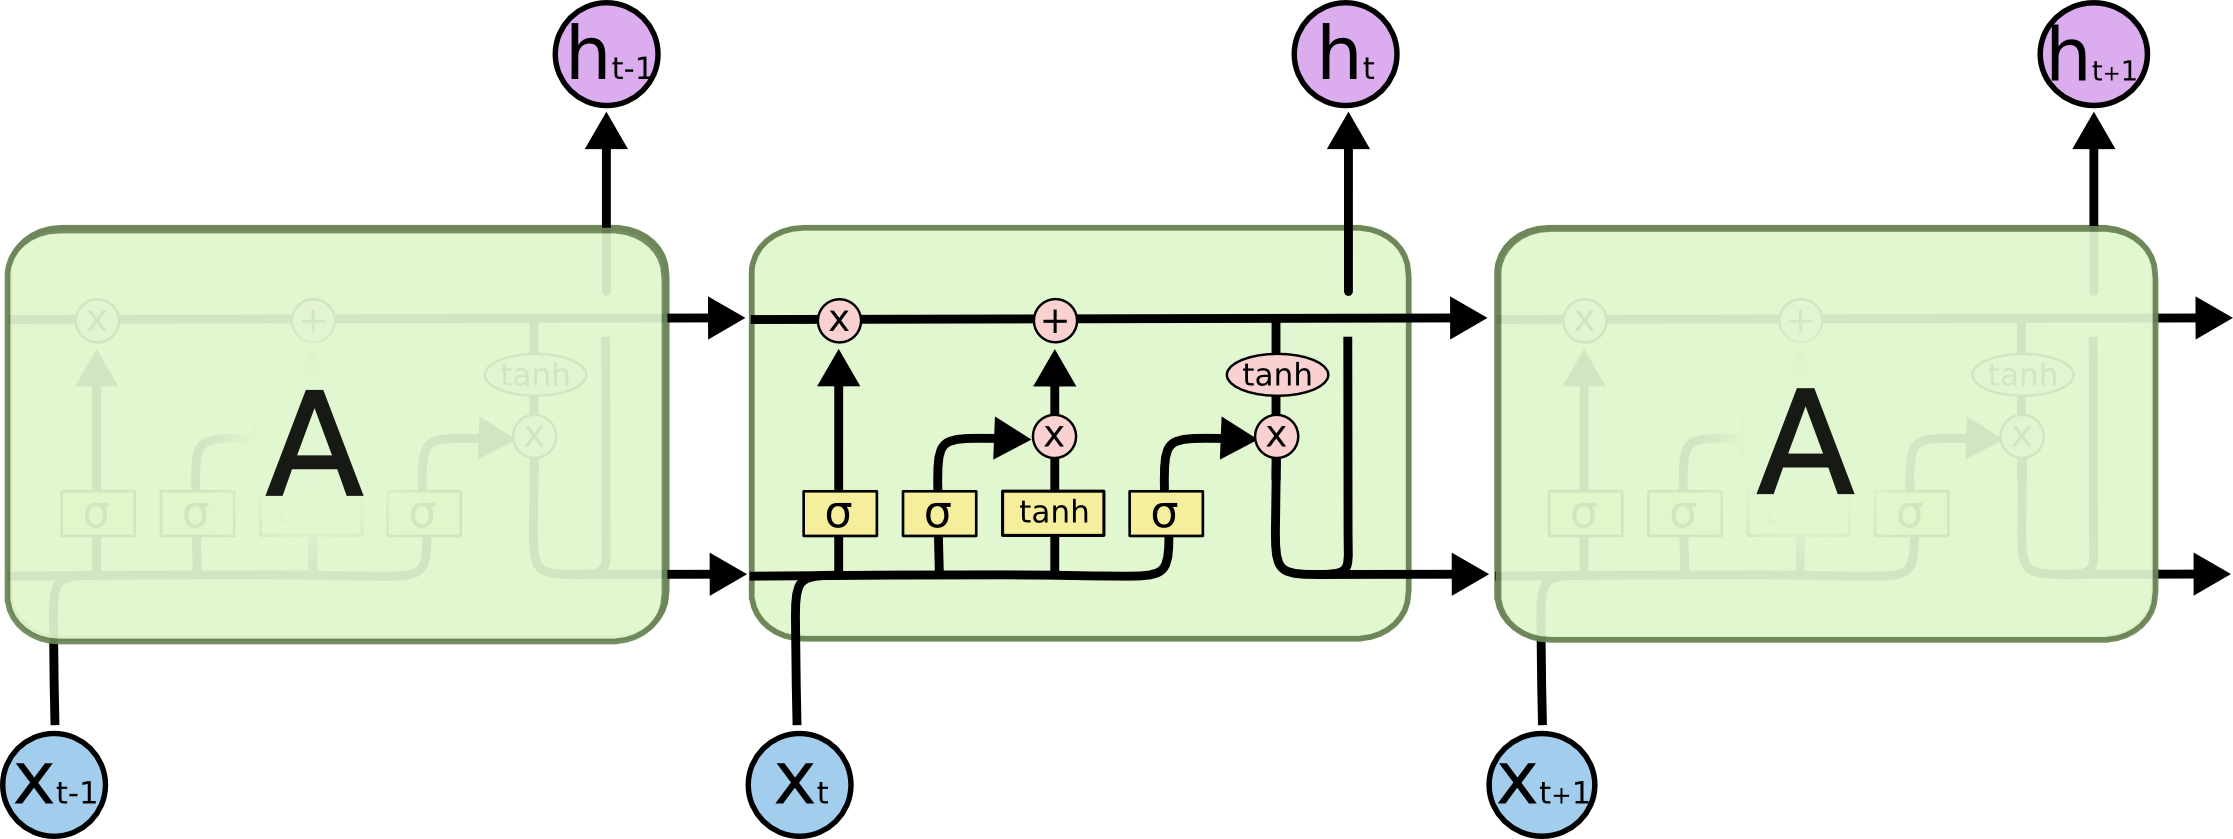

In [276]:
from keras.layers import LSTM

inputs = Input(shape=(sequence_length, ))
z = Embedding(vocabulary_size, embedding_dim, input_length=sequence_length)(inputs)
lstms = LSTM(100)(z)
model_output = Dense(1, activation="sigmoid")(lstms)

nnet = Model(inputs, model_output)
nnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nnet.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=batch_size)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 186s 7ms/step - loss: 0.4879 - acc: 0.7512 - val_loss: 0.3610 - val_acc: 0.8463
Epoch 2/3
25000/25000 [==============================] - 178s 7ms/step - loss: 0.3080 - acc: 0.8748 - val_loss: 0.3443 - val_acc: 0.8648
Epoch 3/3
25000/25000 [==============================] - 187s 7ms/step - loss: 0.2769 - acc: 0.8871 - val_loss: 0.3039 - val_acc: 0.8750


# Задания

<ol>
    <li>Вместо LinearSVC попробовать использовать другие алгоритмы классификации и сравнить результаты.</li>
    <li>Реализовать нейросети для классификации данных со StackOverflow.</li>
</ol>
    

# +380971549183

# marchenkophilip@gmail.com

<ul>
    <li><a href="http://arxiv.org">arXiv</a></li>
    <li><a href="http://colah.githab.io">LSTM и модификации</a></li>
    <li><a href="http://machinelearningmastery.com">Machine Learning Mastery</a></li>
    <li><a href="http://radimrehurek.com/gensim/models/word2vec.html">word2vec</a></li>
    <li><a href="http://nlpx.net/archives/179">Ещё w2v</a></li>
    <li><a href="http://www.lifestyletrading101.com/word2vec-deep-learning/">Ого, ещё w2v</a></li>
    <li><a href="https://habr.com/company/ods/blog/329410/">Очень детально о векторных представлениях, в том числе и о w2v</a></li>
    <li><a href="https://arxiv.org/pdf/1709.08267.pdf">Ребята из Вирджинии о текстовой классификации</a></li>
    <li><a href="https://arxiv.org/pdf/1509.01626.pdf">Университет Нью-Йорка о классификации с помощью свёрточных нейросетей</a></li>
    <li><a href="https://arxiv.org/pdf/1511.08630.pdf">I have a CNN, I have LSTM... Ahhhh! C-LSTM</a></li>
</ul>